# Random Graph Models

This tutorial will introduce the following random graph models: 
 - Erdos-Reyni (ER)
 - Degree-corrected Erdos-Reyni (DCER)
 - Stochastic block model (SBM)
 - Degree-corrected stochastic block model (DCSBM)
 - Random dot product graph (RDPG)

## Load some data from _GraSPy_

For this example we will use the _Drosophila melanogaster_ larva right mushroom body connectome. Here we will consider a binarized, undirected version of the graph.

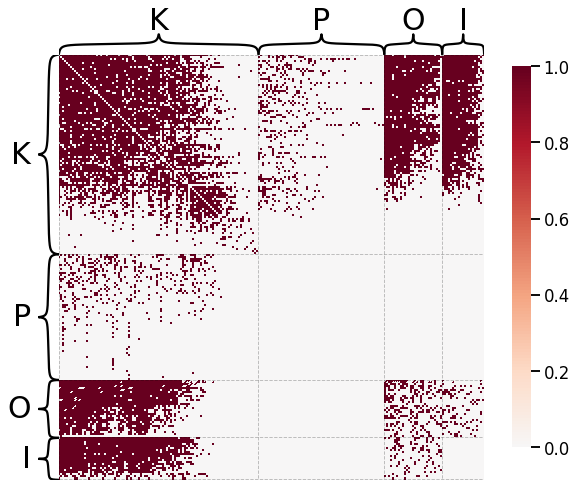

In [1]:
import numpy as np 
from graspy.datasets import load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize
%matplotlib inline

adj, labels = load_drosophila_right(return_labels=True)
adj = symmetrize(adj, method='avg')
adj = binarize(adj)
heatmap(adj, inner_hier_labels=labels, transform='simple-nonzero');

## Preliminaries

$n$ - the number of nodes in the graph

$A$ - $n \times n$ adjacency matrix

$P$ - $n \times n$ matrix of probabilities


For the class of models we will consider here, a graph (adjacency matrix) $A$ is sampled as follows:

$$A \sim Bernoulli(P)$$

While each model we will discuss follows this formulation, they differ in how the matrix $P$ is constructed. So, for each model, we will consider how to model $P_{ij}$, or the probability of connection between any node $i$ and $j$, with $i \neq j$ in this case (i.e. no "loops" are allowed for the sake of this tutorial).


------


### For each graph model we will show: 
- how the model is formulated 
- how to fit the model using GraSPy
- the P matrix that was fit by the model 
- a single sample from the fit model

## Erdos-Reyni (ER)
The Erdos-Reyni (ER) model is the simplest random graph model one could write down. We are interested in modeling the probability of an edge existing between any two nodes, $i$ and $j$. We denote this probability $P_{ij}$. For the ER model:

$$P_{ij} = p$$

for any combination of $i$ and $j$

This means that the one parameter $p$ is the overall probability of connection for any two nodes. 

ER "p" parameter: 0.2479666732791113


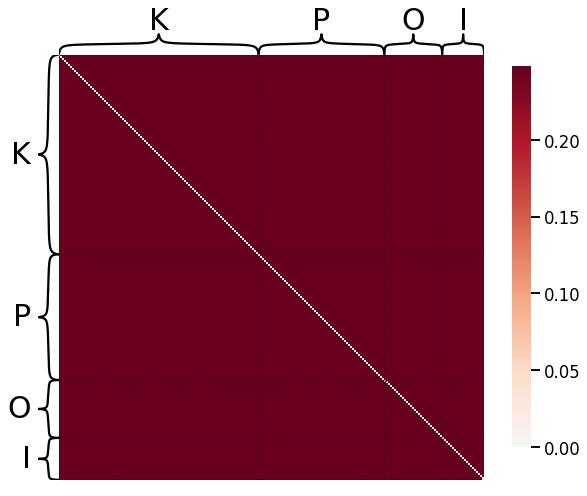

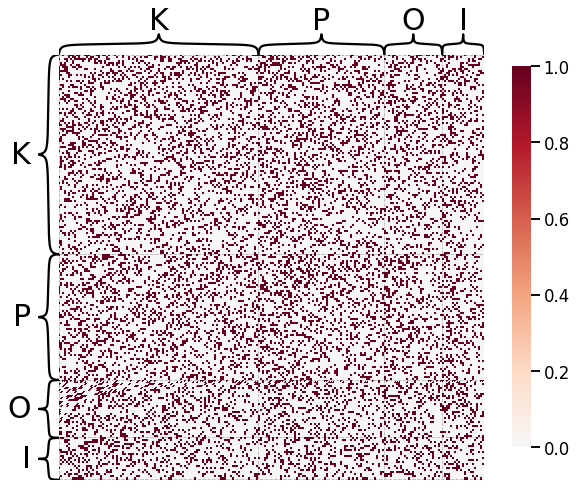

In [2]:
from graspy.models import EREstimator
er = EREstimator(directed=True,loops=False)
er.fit(adj)
print(f"ER \"p\" parameter: {er.p_}")
heatmap(er.p_mat_, inner_hier_labels=labels,)
heatmap(er.sample()[0], inner_hier_labels=labels,);

## Degree-corrected Erdos-Reyni (DCER)

A slightly more complicated variant of the ER model is the degree-corrected Erdos-Reyni model (DCER). Here, there is still a global parameter $p$ to specify relative connection probability between all edges. However, we add a promiscuity parameter $\theta_i$ for each node $i$ which specifies its expected degree relative to other nodes:

$$P_{ij} = \theta_i \theta_j p$$

so the probility of an edge from $i$ to $j$ is a function of the two nodes' degree-correction parameters, and the overall probability of an edge in the graph. 

ER "p" parameter: 11250.0


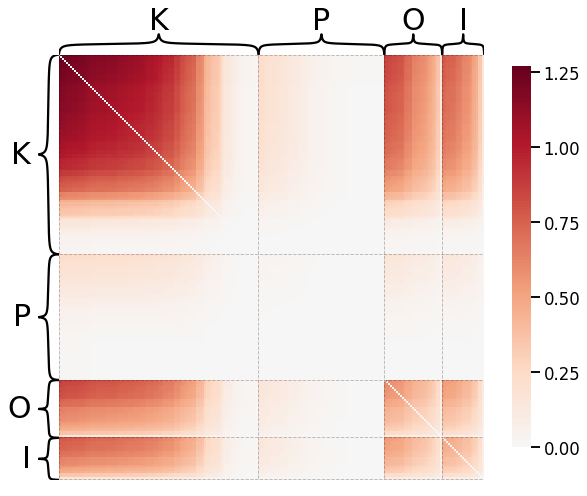

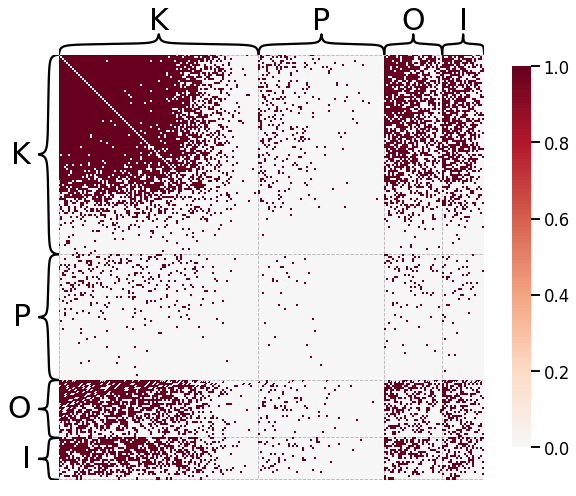

In [3]:
from graspy.models import DCEREstimator
dcer = DCEREstimator(directed=True,loops=False)
dcer.fit(adj)
print(f"ER \"p\" parameter: {dcer.p_}")
heatmap(dcer.p_mat_, inner_hier_labels=labels,);
heatmap(dcer.sample()[0], inner_hier_labels=labels,);

## Stochastic block model (SBM)
Under the stochastic block model (SBM), each node is modeled as belonging to a block (sometimes called a community or group). The probability of node $i$ connecting to node $j$ is simply a function of the block membership of the two nodes. Let $n$ be the number of nodes in the graph, then $\tau$ is a length $n$ vector which indicates the block membership of each node in the graph. Let $K$ be the number of blocks, then $B$ is a $K \times K$ matrix of block-block connection probabilities. 

$$P_{ij} = B_{\tau_i \tau_j}$$

SBM "B" matrix:
[[0.         0.53238095 0.17077176 0.        ]
 [0.53238095 0.4714     0.49448276 0.07587302]
 [0.17077176 0.49448276 0.31866825 0.        ]
 [0.         0.07587302 0.         0.        ]]


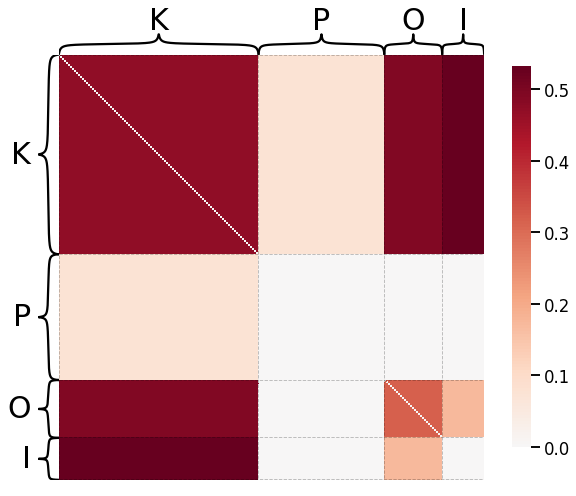

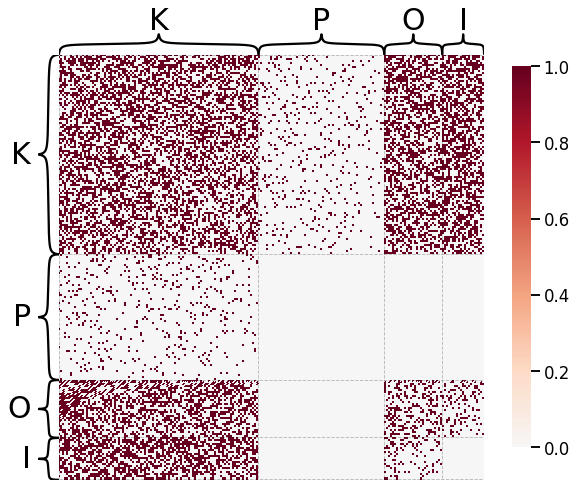

In [4]:
from graspy.models import SBMEstimator
sbme = SBMEstimator(directed=True,loops=False)
sbme.fit(adj, y=labels)
print("SBM \"B\" matrix:")
print(sbme.block_p_)
heatmap(sbme.p_mat_, inner_hier_labels=labels,)
heatmap(sbme.sample()[0], inner_hier_labels=labels,);

## Degree-corrected stochastic block model (DCSBM)
Just as we could add a degree-correction term to the ER model, so too can we modify the stochastic block model to allow for heterogeneous expected degrees. Again, we let $\theta$ be a length $n$ vector of degree correction parameters, and all other parameters remain as they were defined above for the SBM: 

$$P_{ij} = \theta_i \theta_j B_{\tau_i, \tau_j}$$

Note that the matrix $B$ may no longer represent true probabilities, becuase the addition of the $\theta$ vectors introduces a multiplicative constant that can be absorbed into the elements of $\theta$

DCSBM "B" matrix:
[[   0. 1118.  104.    0.]
 [1118. 4714. 1434.  478.]
 [ 104. 1434.  268.    0.]
 [   0.  478.    0.    0.]]


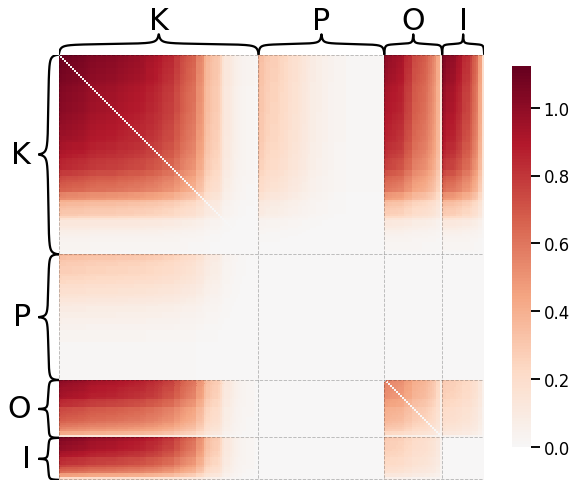

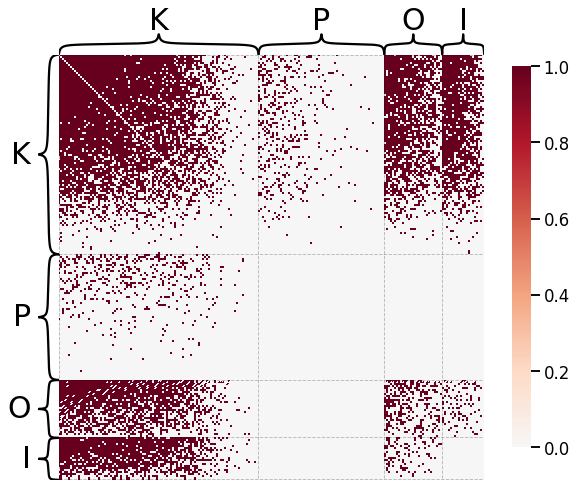

In [5]:
from graspy.models import DCSBEstimator
dcsbe = DCSBEstimator(directed=True,loops=False)
dcsbe.fit(adj, y=labels)
print("DCSBM \"B\" matrix:")
print(dcsbe.block_p_)
heatmap(dcsbe.p_mat_, inner_hier_labels=labels,)
heatmap(dcsbe.sample()[0], inner_hier_labels=labels,);

## Random dot product graph (RDPG)

Under the random dot product graph model, each node is assumed to have a "latent position" in some $d$-dimensional Euclidian space. This vector dictates that node's probability of connection to other nodes. For a given pair of nodes $i$ and $j$, the probability of connection is the dot product between their latent positions. If $x_i$ and $x_j$ are the latent positions of nodes $i$ and $j$, respectively:

$$P_{ij} = \langle x_i, x_j \rangle$$



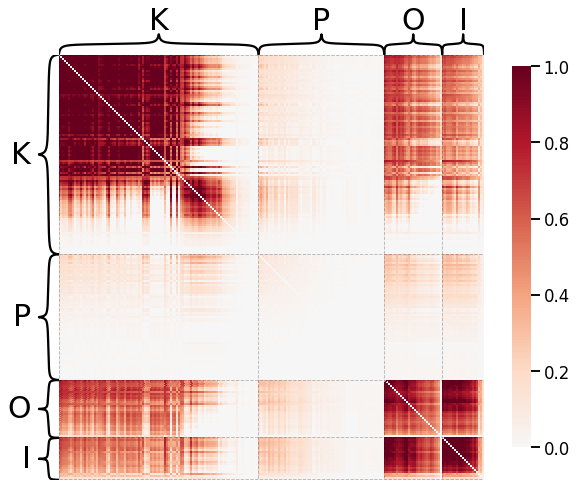

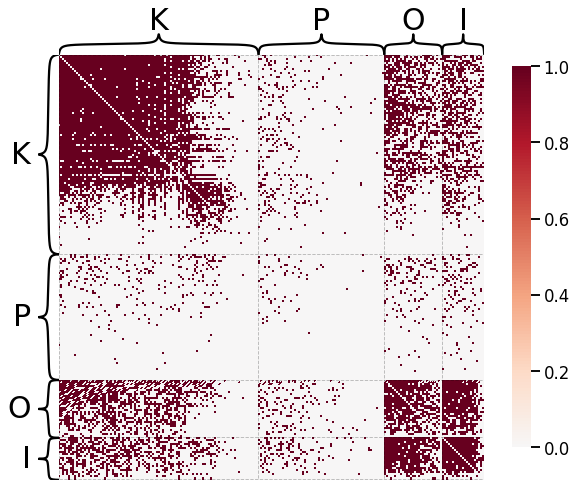

In [6]:
from graspy.models import RDPGEstimator
rdpge = RDPGEstimator(loops=False)
rdpge.fit(adj, y=labels)
heatmap(rdpge.p_mat_, inner_hier_labels=labels,)
heatmap(rdpge.sample()[0], inner_hier_labels=labels,);